# 📌 Handling Missing Data
#### Missing values are common in real-world datasets and must be handled before training ML models.

## 🎯 Why Handle Missing Values?
<ul>
    <li>Most ML algorithms cannot handle NaN values</li>
    <li>Missing data can bias results</li>
    <li>Reduces model accuracy</li>
    <li>Affects statistical assumptions</li>
</ul>

---

## 🧠 Main Approaches to Handle Missing Values
### 1️⃣ Remove Rows (Complete Case Analysis - CCA)
#### When to Use CCA?
<ul>
    <li>Missing values are very small (<5%)</li>
    <li>Data is missing completely at random (MCAR)</li>
</ul>

### 2️⃣ Imputation (Fill Missing Values)


# 🔹 A) Simple Imputation (Univariate)
#### Treats each column independently

## For Numerical Data
## 1️⃣ Mean Imputation
#### Replace with average.
```sh
SimpleImputer(strategy='mean')
```

✔ Works for normal distribution <br/>
❌ Sensitive to outliers

## 2️⃣ Median Imputation
#### Replace with median.
```sh
strategy='median'
```
 ✔ Good for skewed data <br/>
✔ Robust to outliers

## Arbitrary Value Imputation
#### missing values are replaced with a fixed constant value that is not necessarily related to the data distribution.
#### Instead of using:
<ul>
    <li>Mean</li>
    <li>Median</li>
    <li>Mode</li>
</ul>

#### We replace missing values with a chosen number like:

```sh
-1
-999
99999
"Missing"
```

### 📊 When Is It Useful?
✔ When missing values might carry meaning <br/>
✔ When you want model to detect missing pattern <br/>
✔ When using tree-based models <br/>
✔ When missing data may represent extreme values
<br/>

## 3️⃣ Random Value Imputation
#### Replace with random sample from same column.
✔ Preserves variance

## 4️⃣ End of Distribution Imputation
#### Replace missing with extreme value.
### Example:
```sh
mean + 3 * std
```
Used when missing may indicate extreme case.

### This works especially well in:
<ul>
    <li>Decision Trees</li>
    <li>Random Forest</li>
    <li>Gradient Boosting</li>
</ul>

---

## For Categorical Data
## 1️⃣ Mode Imputation
```sh
strategy='most_frequent'
```
✔ Replace with most common category

## 2️⃣ Missing Category
#### Replace with new category:
```sh
"Missing"
```
✔ Helps model learn missing pattern

# 📌 B) Multivariate Imputation
#### Missing values are predicted using other features in the dataset.

#### Unlike Simple Imputation (mean/median), which treats each column independently,
#### multivariate methods use relationships between variables.

## 🎯 Why Do We Use It?
#### Because features in real datasets are often correlated.

### Example:
```sh
Age	Salary
25	30000
40	60000
NaN	55000
```

If salary is known, age can be estimated. <br/>
Simple mean imputation ignores this relationship. <br/>
Multivariate imputation uses it. 

---

## 🔹 Types of Multivariate Imputation
## 1️⃣ KNN Imputation
#### Uses K-Nearest Neighbors to fill missing values.
### Steps:
<ul>
    <li>Find K most similar rows</li>
    <li>Use their values to estimate missing one</li>
    <li>Usually takes average</li>
</ul>

### In sklearn:
```sh
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
```

## 2️⃣ Iterative Imputation (MICE)
#### Multiple Imputation by Chained Equations
### 🧠 Idea:
#### Predict missing values using regression models.

### Process:
<ul>
    <li>Choose one feature with missing values</li>
    <li>Treat it as target variable</li>
    <li>Use other features to predict it</li>
    <li>Repeat for all columns</li>
    <li>Iterate multiple times</li>
</ul>

### In sklearn:
```sh
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
```

### ✅ Advantages:

<ul>
    <li>More accurate</li>
    <li>Uses correlation</li>
    <li>Works well when features are strongly related</li>
</ul>

### ❌ Disadvantages:
<ul>
    <li>Slow</li>
    <li>Complex</li>
    <li>Can overfit</li>
</ul>

# Handling missing data with python numpy

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [22]:
df = pd.read_csv('./titanic_toy.csv')

In [27]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [29]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [30]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

X_train.isnull().mean()

In [36]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

In [39]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [45]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
834,18.0,8.3000,0,18.0,18.0,8.3000,8.3000
135,23.0,15.0458,0,23.0,23.0,15.0458,15.0458
884,25.0,7.0500,0,25.0,25.0,7.0500,7.0500
880,25.0,26.0000,1,25.0,25.0,26.0000,26.0000
243,22.0,7.1250,0,22.0,22.0,7.1250,7.1250


In [51]:
print('Original Age variable variancd: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('\nOriginal Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variancd:  204.3495133904614
Age Variance after median imputation:  162.33852985330878
Age Variance after mean imputation:  161.813866455868

Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.098181126126
Fare Variance after mean imputation:  2324.2440261087


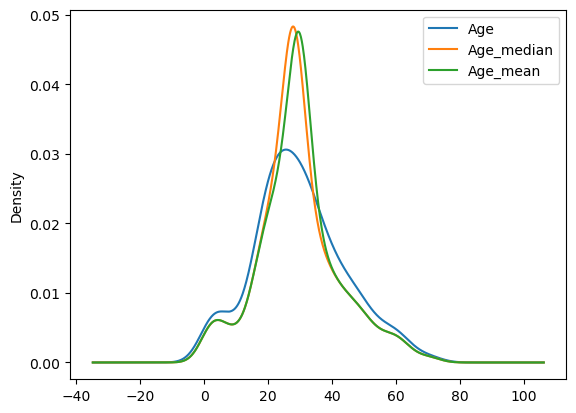

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with median
X_train['Age_median'].plot(kind='kde', ax=ax)

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax)

# Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

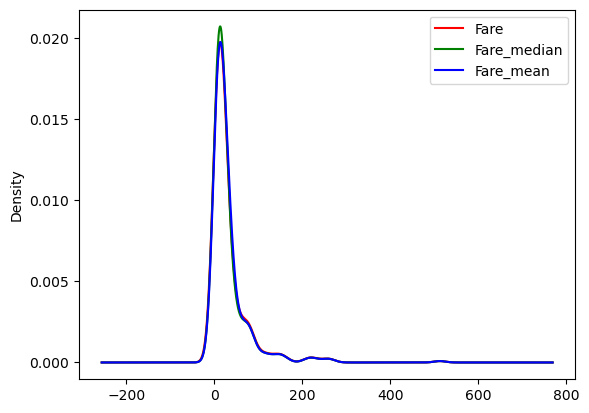

In [67]:
fig = plt.figure()
ax = fig.add_subplot()

# Origina variable distribution
X_train['Fare'].plot(kind='kde', ax=ax, color='red')

# vairiable imputed with median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

# variable imputed with mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='blue')

# add labels
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [68]:
# Covariance measures how two variables change together.
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858451,66.631558
Fare,70.719262,2448.197914,17.258917,59.661820,55.800924,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.088278,-5.143296,16.476326,16.386748
Age_median,204.349513,59.661820,-5.088278,162.338530,161.838181,55.142638,56.613065
Age_mean,204.349513,55.800924,-5.143296,161.838181,161.813866,51.541608,52.948856
Fare_median,64.858451,2448.197914,16.476326,55.142638,51.541608,2340.098181,2324.533881
Fare_mean,66.631558,2448.197914,16.386748,56.613065,52.948856,2324.533881,2324.244026


In [70]:
# Correlation is the standardized version of covariance. And it is bounded between -1 to +1
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087355,0.090109
Fare,0.092644,1.000000,0.208268,0.094361,0.088382,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.241469,-0.244475,0.205942,0.205520
Age_median,1.000000,0.094361,-0.241469,1.000000,0.998533,0.089466,0.092165
Age_mean,1.000000,0.088382,-0.244475,0.998533,1.000000,0.083759,0.086339
Fare_median,0.087355,1.000000,0.205942,0.089466,0.083759,1.000000,0.996731
Fare_mean,0.090109,1.000000,0.205520,0.092165,0.086339,0.996731,1.000000


<Axes: >

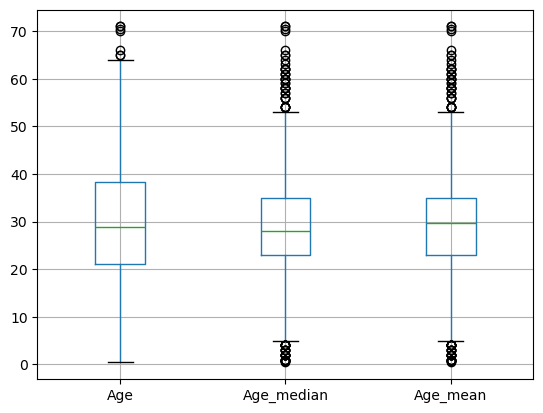

In [72]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

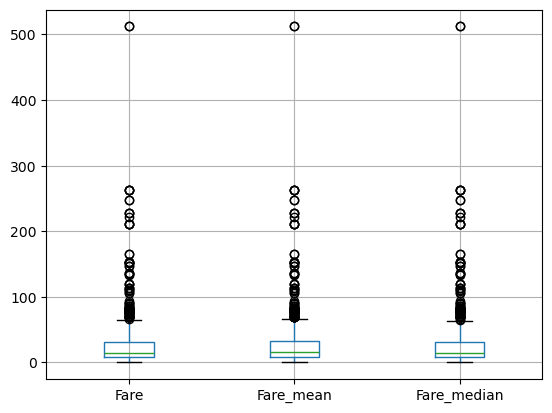

In [73]:
X_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

# Using sklearn

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age_imputer', SimpleImputer(strategy='median'), ['Age']),
        ('fare_imputer', SimpleImputer(strategy='mean'), ['Fare'])
    ],
    remainder='passthrough'
)

### Get the Transformed Data

In [79]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [84]:
X_train_transformed

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

## Combine With Model

In [82]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression())
])

In [83]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age']),
                                                 ('fare_imputer',
                                                  SimpleImputer(),
                                                  ['Fare'])])),
                ('model', LogisticRegression())])

In [96]:
# Predict Cleanly
Y_pred = pipe.predict(X_test)

In [97]:
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [91]:
pipe.score(X_test, Y_test) # returns accuracy

0.6201117318435754

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
print(confusion_matrix(Y_test, Y_pred))

[[94  6]
 [62 17]]


In [100]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.94      0.73       100
           1       0.74      0.22      0.33        79

    accuracy                           0.62       179
   macro avg       0.67      0.58      0.53       179
weighted avg       0.66      0.62      0.56       179

